##1. Loading dataset and importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Netflix_dataset.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


##2. Data Finishing

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64



*   3 missing values in duration column



In [ ]:
index = df[df['duration'].isna()].index

In [ ]:
df.loc[index] = df.loc[index].fillna(method = 'ffill' , axis = 1)

In [ ]:
df.loc[index,'rating'] = 'Not Available'

In [ ]:
df.loc[index]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Available,66 min,Movies,The comic puts his trademark hilarious/thought...




2. To fill null values in ratings column



In [ ]:
df[df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
ind1 = df[df.rating.isna()].index

In [ ]:
df.loc[ind1, 'rating'] = 'Not Available'

In [ ]:
df.loc[ind1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,Not Available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not Available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not Available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."




3. Null values in date_added column



In [ ]:
df['date_added'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: date_added, Length: 8807, dtype: bool

In [ ]:
df.loc[df['date_added'].isna()].index

Index([6066, 6174, 6795, 6806, 6901, 7196, 7254, 7406, 7847, 8182], dtype='int64')

In [ ]:
df.drop(df.loc[df['date_added'].isna()].index, axis = 0, inplace = True)

In [ ]:
df['date_added'].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8797, dtype: datetime64[ns]

In [ ]:
df['year_added']=df['date_added'].dt.year

In [ ]:
df['year_added']

0       2021.0
1       2021.0
2       2021.0
3       2021.0
4       2021.0
         ...  
8802    2019.0
8803    2019.0
8804    2019.0
8805    2020.0
8806    2019.0
Name: year_added, Length: 8797, dtype: float64

In [ ]:
df['month_added']=df['date_added'].dt.month

In [ ]:
df['month_added']

0        9.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
8802    11.0
8803     7.0
8804    11.0
8805     1.0
8806     3.0
Name: month_added, Length: 8797, dtype: float64

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added        88
release_year       0
rating             0
duration           0
listed_in          0
description        0
year_added        88
month_added       88
dtype: int64

## 3. Data Analysis

3.1 Content 'type'

In [ ]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
movies = df[df['type'] == 'Movie']

In [ ]:
movies.duration.value_counts()

duration
90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: count, Length: 205, dtype: int64

In [ ]:
tvs = df[df['type'] == 'TV Show']

In [ ]:
tvs.duration.value_counts()

duration
1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: count, dtype: int64

Change format of duration for movies in minutes and TV shows in seasons

In [ ]:
# Change format of duration for movies in minutes and TV shows in seasons
movies['duration'] = movies['duration'].str[:-3]
movies['duration'] = movies['duration'].astype(float)

In [ ]:
tvs['duration'] = tvs['duration'].str[:-7].apply(lambda x: x.strip())
tvs['duration'] = tvs['duration'].astype(float)

In [ ]:
movies.rename(columns = {'duration' : 'duration_in_minutes'}, inplace = True)
tvs.rename(columns = {'duration' : 'duration_in_seasons'}, inplace = True)

In [ ]:
movies.duration_in_minutes

0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration_in_minutes, Length: 6131, dtype: float64

In [ ]:
tvs.duration_in_seasons

1       2.0
2       1.0
3       1.0
4       2.0
5       1.0
       ... 
8795    2.0
8796    2.0
8797    3.0
8800    1.0
8803    2.0
Name: duration_in_seasons, Length: 2666, dtype: float64

3.2 First movie added to **netflix**

In [ ]:
movies.date_added.min()

Timestamp('2008-01-01 00:00:00')

In [ ]:
# extract date
first_movie = movies.date_added.min().strftime('%B %Y')
first_movie

'January 2008'

3.3 Most recent movie added to Netflix

In [ ]:
movies.date_added.max()

Timestamp('2021-09-25 00:00:00')

In [ ]:
# extract date
recent_movie = movies.date_added.max().strftime('%B %Y')
recent_movie

'September 2021'

3.4 First TV show added to netflix

In [ ]:
tvs.date_added.min()

Timestamp('2008-02-04 00:00:00')

In [ ]:
first_tvs = tvs.date_added.min().strftime('%B %Y')
first_tvs

'February 2008'

3.5 Recent TV show added to netflix

In [ ]:
tvs.date_added.max()

Timestamp('2021-09-24 00:00:00')

In [ ]:
recent_tvs = tvs.date_added.max().strftime('%B %Y')
recent_tvs

'September 2021'

3.6 In which year the oldest and the newest movie was released ?

In [ ]:
movies.release_year.min(), movies.release_year.max()

(1942, 2021)

3.7 In which year the oldest and the newest TV show was released ?

In [ ]:
tvs.release_year.min(), tvs.release_year.max()

(1925, 2021)

Ratings

In [ ]:
df.rating.value_counts()

rating
TV-MA            3205
TV-14            2157
TV-PG             861
R                 799
PG-13             490
TV-Y7             333
TV-Y              306
PG                287
TV-G              220
NR                 79
G                  41
Not Available       7
TV-Y7-FV            6
NC-17               3
UR                  3
Name: count, dtype: int64

In [ ]:
df.groupby('type')['rating'].value_counts()

type     rating       
Movie    TV-MA            2062
         TV-14            1427
         R                 797
         TV-PG             540
         PG-13             490
         PG                287
         TV-Y7             139
         TV-Y              131
         TV-G              126
         NR                 75
         G                  41
         TV-Y7-FV            5
         Not Available       5
         UR                  3
         NC-17               3
TV Show  TV-MA            1143
         TV-14             730
         TV-PG             321
         TV-Y7             194
         TV-Y              175
         TV-G               94
         NR                  4
         R                   2
         Not Available       2
         TV-Y7-FV            1
Name: count, dtype: int64

3.8 What type of content is available in different countries?

In [ ]:
df['country'].nunique()

748

In [ ]:
df['country'].value_counts()

country
United States                             2812
India                                      972
United Kingdom                             418
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

There are multiple country names against some of the movies.
The 'country' column needs to be processed in order to get accurate number of movies produced in each country

In [ ]:
# seperate out country , id and type column as a table
df_country = df[['show_id', 'country', 'type']]

In [ ]:
df_country.dropna(inplace = True)

In [ ]:
df_country['country'] = df_country['country'].str.split(', ')

In [ ]:
df_country = df_country.explode('country')

In [ ]:
df_country['country'] = df_country['country'].str.strip()

In [ ]:
df_country.loc[df_country['country'] == '']

,show_id,country,type
193,s194,,TV Show
365,s366,,Movie


In [ ]:
df_country.drop(df_country.loc[df_country['country'] == ''].index, axis = 0, inplace = True)

In [ ]:
df_country['country'].nunique()

126

Countrywise movie and TV show count:

In [ ]:
a = df_country.groupby(['country', 'type'])['show_id'].count().reset_index()

In [ ]:
a.pivot(index=['country'], columns = 'type', values = 'show_id').sort_values('Movie', ascending = False)

type,Movie,TV Show
country,,
United States,2751.0,932.0
India,962.0,84.0
United Kingdom,532.0,271.0
Canada,319.0,126.0
France,302.0,90.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


3.9 How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
x =df.groupby('year_added')['show_id'].count().reset_index()
x

,year_added,show_id
0,2008.0,2
1,2009.0,2
2,2010.0,1
3,2011.0,13
4,2012.0,3
5,2013.0,10
6,2014.0,23
7,2015.0,73
8,2016.0,418
9,2017.0,1164


3.10 Analysis of actors/directors of different types of shows/movies.

i. Director

In [ ]:
df.director.value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [ ]:
# create seperate director table
dir = df[['show_id', 'director', 'type']]

In [ ]:
dir.isna().sum()

show_id        0
director    2624
type           0
dtype: int64

In [ ]:
# drop NA values
dir.dropna(inplace = True)

In [ ]:
# split comma seperated strings
dir['director'] = dir['director'].str.split(', ')

In [ ]:
dir = dir.explode('director')
dir['director']= dir['director'].str.strip()

In [ ]:
# To count unique directors
dir['director'].nunique()

4993

To calculate total movies and TV shows directed by each director

In [ ]:
# calculate total movies and TV shows directed by each director
dir_count = dir.groupby(['director', 'type'])['show_id'].count().reset_index()

In [ ]:
dir_count.sort_values('show_id', ascending = False)

,director,type,show_id
3810,Rajiv Chilaka,Movie,22
1931,Jan Suter,Movie,21
3863,Raúl Campos,Movie,19
4529,Suhas Kadav,Movie,16
1982,Jay Karas,Movie,15
...,...,...,...
2301,Josh Greenbaum,Movie,1
2302,Josh Izenberg,Movie,1
2303,Josh Koury,Movie,1
2304,Josh Lowell,Movie,1


ii. Cast

In [ ]:
# create a seperate cast table
cast = df[['show_id', 'cast', 'type']]

In [ ]:
# drop null values
cast.dropna(inplace = True)

In [ ]:
#split comma seperated strings
cast['cast'] = cast['cast'].str.split(', ')

In [ ]:
# explode
cast = cast.explode('cast')
cast['cast'] = cast['cast'].str.strip()

In [ ]:
cast['cast'].nunique()


36403

In [ ]:
# to calculate total movies/TV shows done by each cast member
cast_count = cast.groupby(['cast', 'type'])['show_id'].count().reset_index()

In [ ]:
print(cast_count.columns)

Index(['cast', 'type', 'show_id'], dtype='object')


In [ ]:
cast_count.pivot(index = 'cast' , columns = 'type' , values = 'show_id').sort_values('TV Show' , ascending = False)

type,Movie,TV Show
cast,,
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Junichi Suwabe,4.0,17.0
Daisuke Ono,5.0,17.0
Ai Kayano,2.0,17.0
...,...,...
Şerif Sezer,1.0,NaN
Şevket Çoruh,1.0,NaN
Şinasi Yurtsever,3.0,NaN


3.11 Genre wise content analysis

In [ ]:
# create special listed_in table
genre = df[['show_id', 'type', 'listed_in',]]

In [ ]:
# process comma seperated strings
genre['listed_in'] = genre['listed_in'].str.split(', ')
# apply explode
genre = genre.explode('listed_in')
genre['listed_in'] = genre['listed_in'].str.strip()

In [ ]:
genre.listed_in.nunique()

42

There are total 42 different genres present in the Netflix content

In [ ]:
df.merge(genre , on = 'show_id' ).groupby(['type_y'])['listed_in_y'].nunique()

type_y
Movie      20
TV Show    22
Name: listed_in_y, dtype: int64

3.12 Does Netflix has more focus on TV Shows than movies in recent years ?

In [ ]:
# calculate total movies/TV shows in each genre
d = genre.groupby(['type', 'listed_in'])['show_id'].count().reset_index()
d.pivot(index = 'listed_in' , columns = 'type' , values = 'show_id').sort_index()

type,Movie,TV Show
listed_in,,
Action & Adventure,859.0,NaN
Anime Features,71.0,NaN
Anime Series,NaN,175.0
British TV Shows,NaN,252.0
Children & Family Movies,641.0,NaN
Classic & Cult TV,NaN,26.0
Classic Movies,116.0,NaN
Comedies,1674.0,NaN
Crime TV Shows,NaN,469.0


## 4. Graphical analysis - Univariate

1. Content vs Type distribution

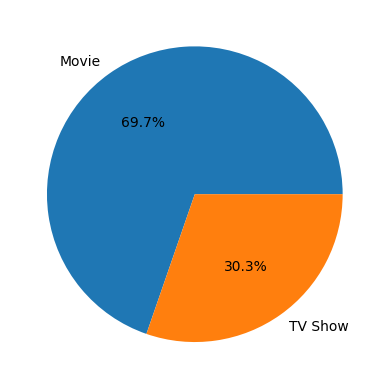

In [ ]:
# number of movies and TV shows comparison through pie chart
types = df['type'].value_counts()
plt.pie(types, labels = types.index, autopct = '%1.1f%%')
plt.show()

2. How number of movies and TV shows added have changed over the years?

In [ ]:
a = df.groupby(['year_added', 'type'])['show_id'].count().reset_index()
a.rename(columns = {'show_id' : 'count'}, inplace = True)

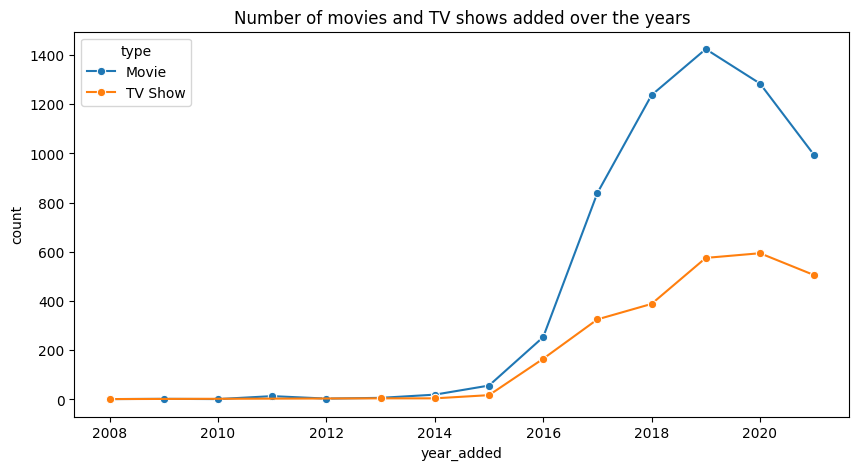

In [ ]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = a, x = 'year_added', y = 'count', hue = 'type', marker = 'o')
plt.title('Number of movies and TV shows added over the years')
plt.show()

Observations:

1. There is visible increase in the addition of content around 2015
2. Highesht number of movies as well as TV shows are added in 2019
3. In year 2020 and 2021 (Pandemic Years) there is decrease in the content
4. After 2015, more focus is observed on movies

3. How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
b= df.groupby(['type', 'release_year'])['show_id'].count().reset_index()
b.rename(columns = {'show_id' : 'count'}, inplace = True)

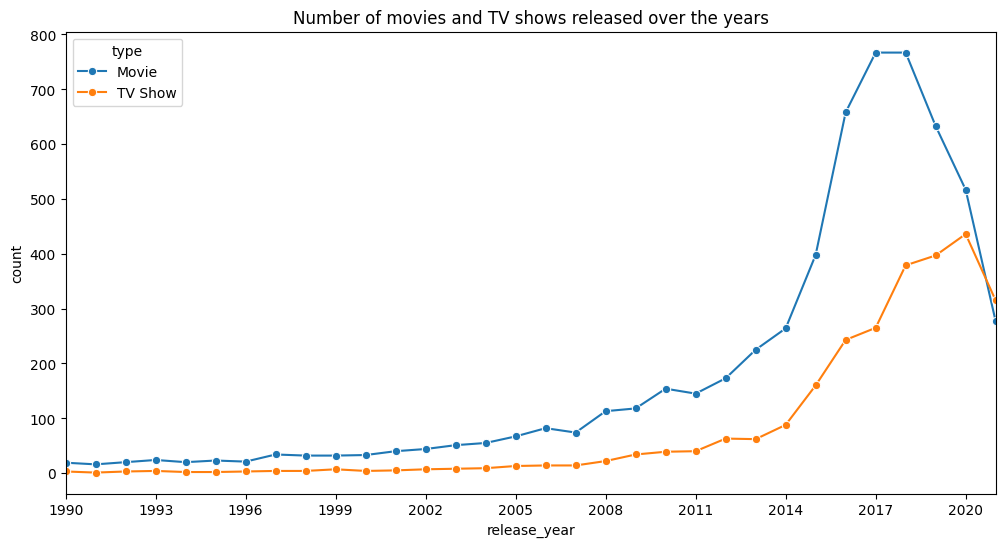

In [ ]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = b, x = 'release_year', y = 'count', hue = 'type', marker = 'o')
plt.title('Number of movies and TV shows released over the years')
plt.xlim(left = 1990, right = 2021)
plt.xticks(np.arange(1990, 2021, 3))
plt.show()

Observation:
   * In 2018 marks highest number of movie and TV show were released.
   * After 2018, Movie releases have dropped.
   * In recent years TV shows are focussed more than Movies.
   * The yearly number of releases has surged visibly from 2015.

4. Number of Movies/TV show per director


In [ ]:
# top 10 directors
top10_dir = dir.director.value_counts().head(10).index
df_new = dir.loc[dir['director'].isin(top10_dir)]

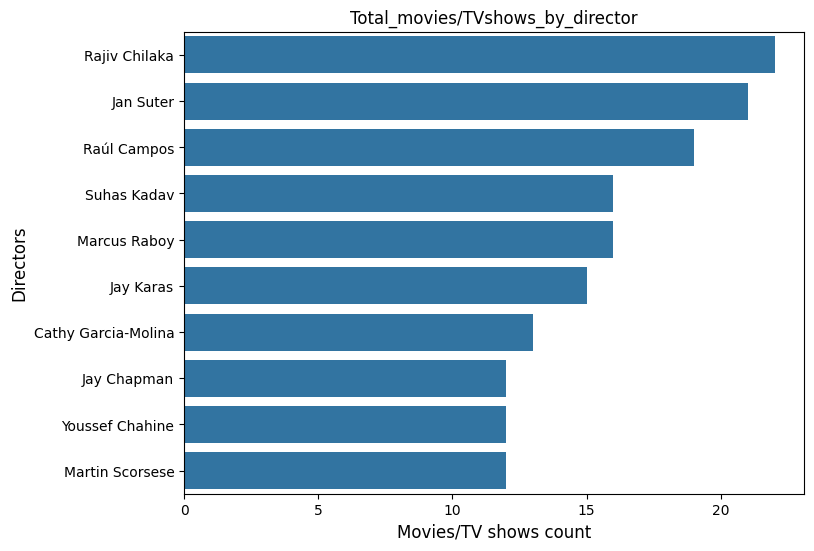

In [ ]:
# plot number of movies/TV shows per director
plt.figure(figsize= (8 , 6))
sns.countplot(data = df_new , y = 'director' , order = top10_dir , orient = 'v')
plt.xlabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('Movies/TV shows count')
plt.ylabel('Directors' , fontsize = 12)
plt.title('Total_movies/TVshows_by_director')
plt.show()

Observations:


*   Top 3 directors on Netflix are: Rajiv Chilaka, Jan Suter and Raul Campos



5. Total number of movies/TV shows by each country

In [ ]:
# top 10 countries
top_10_country = df_country.country.value_counts().head(10).index
df_new = df_country.loc[df_country['country'].isin(top_10_country)]

In [ ]:
x = df_new.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2751,932
India,962,84
United Kingdom,532,271
Canada,319,126
France,302,90
Germany,182,44
Spain,171,61
Japan,119,198
Mexico,111,58


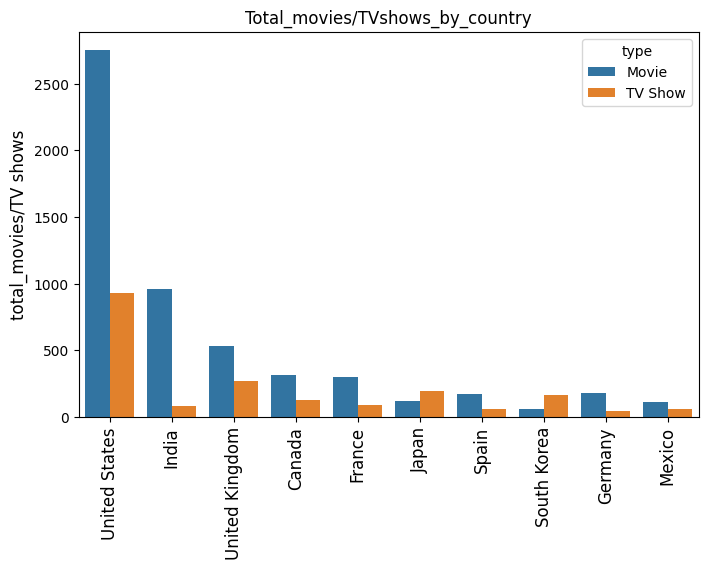

In [ ]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

Observations:


*   United States have major contribution in the Netflix content followed by India and United Kingdom



6. Total content distribution over the years

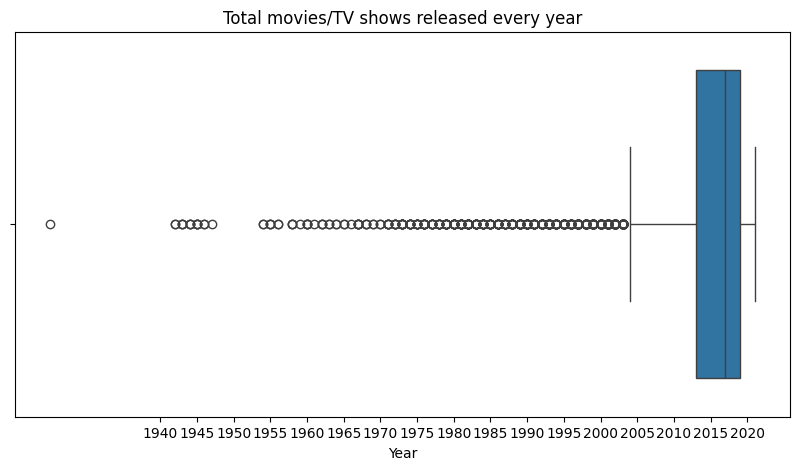

In [ ]:
# plot to analyze nature of quantity of content released over the years
plt.figure(figsize = (10, 5))
sns.boxplot(data = df , x = 'release_year')
plt.xlabel('Year')
plt.title('Total movies/TV shows released every year')
plt.xticks(np.arange(1940, 2021, 5))
plt.show()

Observation:
* Majority of content is released between years 2000 to 2021

7. Movies/TV shows distribution by content ratings

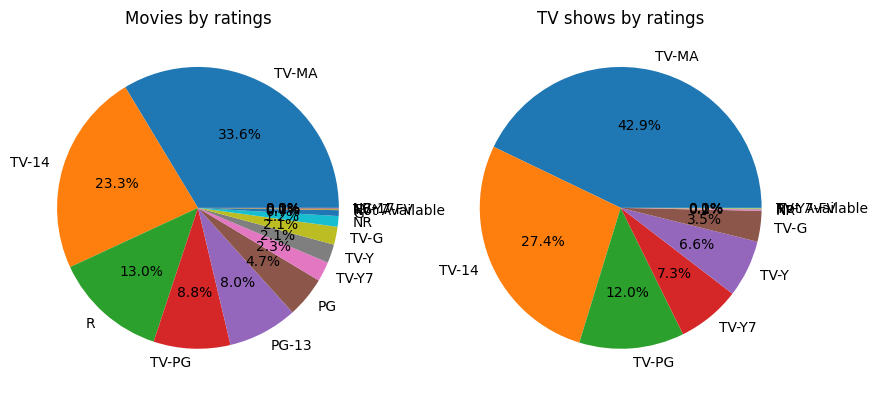

In [ ]:
m = movies.rating.value_counts()
t = tvs.rating.value_counts()
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].pie(m, labels = m.index, autopct = '%1.1f%%')
ax[0].set_title('Movies by ratings')
ax[1].pie(t, labels = t.index, autopct = '%1.1f%%')
ax[1].set_title('TV shows by ratings')
plt.show()

Observation:

* Maximum content (Both movies and TV shows) is rated TV-MA (for mature audience)
* TV-14 and TV-PG come second and third respectively


In [ ]:
m = movies.rating.value_counts()

In [ ]:
tvs.rating.value_counts()

rating
TV-MA            1143
TV-14             730
TV-PG             321
TV-Y7             194
TV-Y              175
TV-G               94
NR                  4
R                   2
Not Available       2
TV-Y7-FV            1
Name: count, dtype: int64

8. Movies and TV shows in each genre

In [ ]:
top_10_movie_genres = genre[genre['type'] == 'Movie'].listed_in.value_counts().head(10).index
df_movie = genre.loc[genre['listed_in'].isin(top_10_movie_genres)]

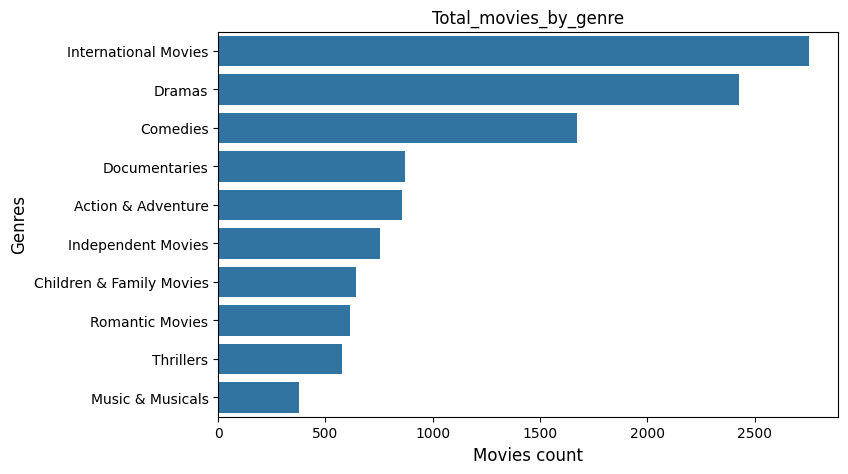

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(data = df_movie , y = 'listed_in' , order = top_10_movie_genres , orient = 'v')
plt.xlabel('total_movies' , fontsize = 12)
plt.xlabel('Movies count')
plt.ylabel('Genres' , fontsize = 12)
plt.title('Total_movies_by_genre')
plt.show()

To 3 genres are:


*   International movies and TV shows
* Dramas
* Comedies



9. Total movies/TV shows distribution by duration of content

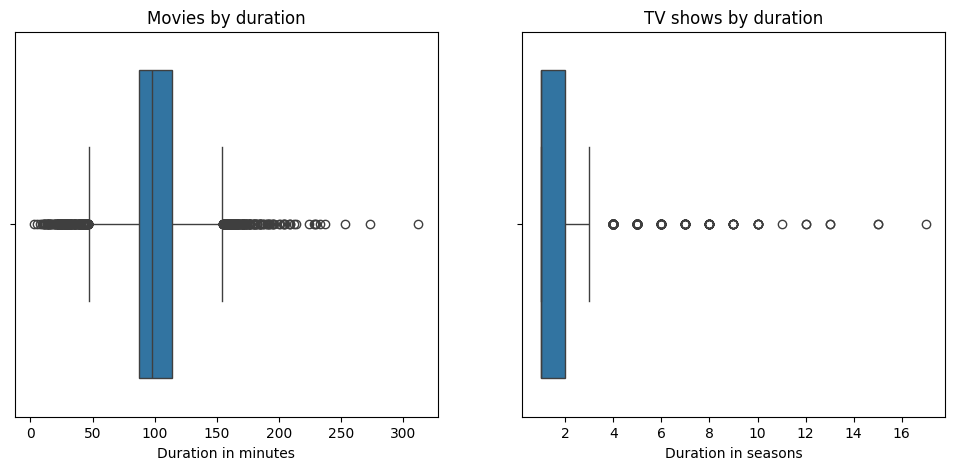

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.boxplot(data = movies , x = 'duration_in_minutes' , ax = ax[0])
ax[0].set_title('Movies by duration')
ax[0].set_xlabel('Duration in minutes')
sns.boxplot(data = tvs , x = 'duration_in_seasons' , ax = ax[1])
ax[1].set_title('TV shows by duration')
ax[1].set_xlabel('Duration in seasons')
plt.show()



*   Most of the movies have duration between 50 to 150 minutes
* Most TV shows have duration between 1 to 3 seasons



## 5. Graphical Analysis - Bivariate

1. What are popular genres in top 10 countries

In [ ]:
top_10_country = df_country.country.value_counts().head(10).index
top_10_country = df_country.loc[df_country['country'].isin(top_10_country)]

In [ ]:
a = top_10_country.merge(genre, on = 'show_id').drop_duplicates()
country_genre = a.groupby(['country', 'listed_in'])['show_id'].count().reset_index()
country_genre = country_genre.pivot(index = 'listed_in', columns = 'country', values = 'show_id')

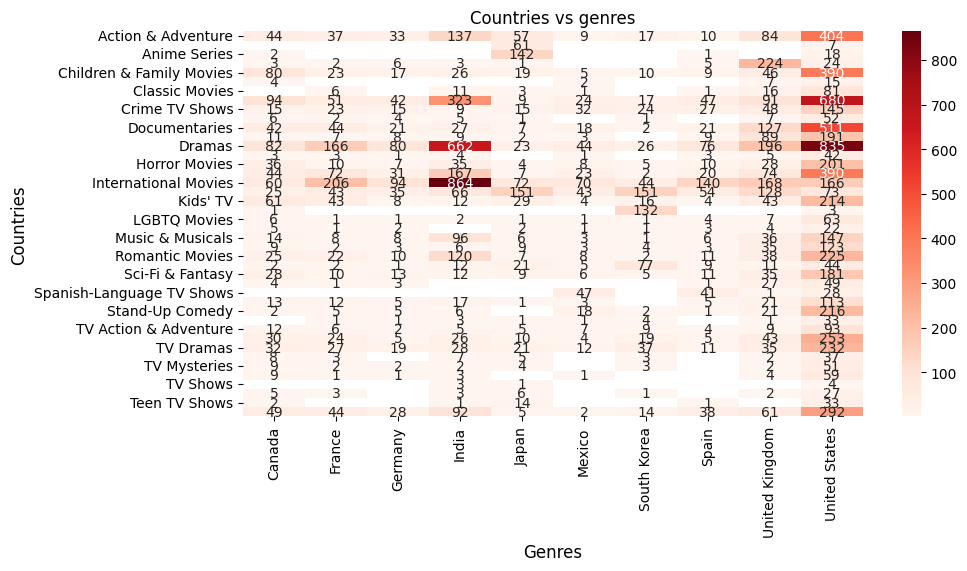

In [ ]:
plt.figure(figsize = (10, 5))
sns.heatmap(country_genre, annot = True, fmt=".0f", cmap= 'Reds')
plt.ylabel('Countries' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Countries vs genres')
plt.show()

Popular genres across countries: Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers
United States and UK have a good mix of almost all genres. Maximum International movies are produced in India.

2. Country wise ratings of content

In [ ]:
b = top_10_country.merge(df, on = 'show_id').groupby(['country_x', 'rating'])['show_id'].count().reset_index()

In [ ]:
country_rating = b.pivot(index = ['country_x'], columns = 'rating', values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Rating')

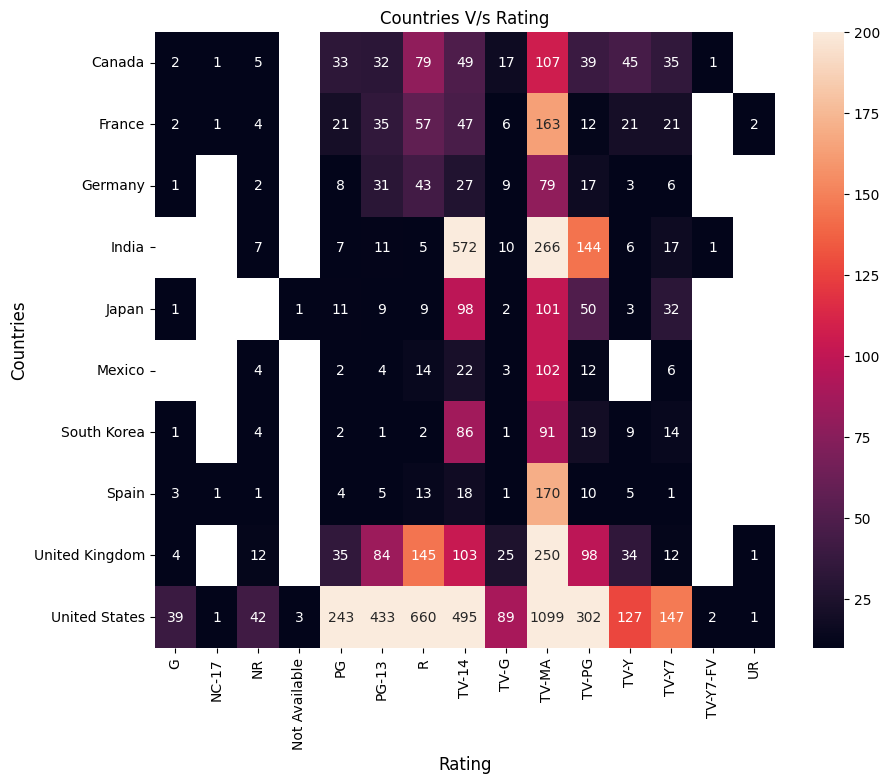

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(data = country_rating , annot = True , fmt=".0f"  , vmin = 10 , vmax=200)
plt.ylabel('Countries' , fontsize = 12)
plt.xlabel('Rating' , fontsize = 12)
plt.title('Countries V/s Rating' , fontsize = 12)

* Netflix has an large amount of adult content across all countries (TV-MA & TV-14).
* India also has many titles rated TV-PG, other than TV-MA & TV-14.
* US, Canada, UK, France and Japan have content for young audiences (TV-Y & TV-Y7).
* There is limited content for general audience (TV-G & G) across all countries except US.

3. Who are the top actors by country?

In [ ]:
a = cast.merge(df_country, on = 'show_id').drop_duplicates()
a = a.groupby(['country', 'cast'])['show_id'].count().reset_index()

In [ ]:
a.loc[a['country'].isin(['United States'])].sort_values('show_id', ascending = False).head()

,country,cast,show_id
49388,United States,Tara Strong,22
48313,United States,Samuel L. Jackson,22
40446,United States,Fred Tatasciore,21
35716,United States,Adam Sandler,20
41655,United States,James Franco,19


In [ ]:
a.loc[a['country'].isin(['India'])].sort_values('show_id', ascending = False).head()

,country,cast,show_id
14182,India,Anupam Kher,40
16822,India,Shah Rukh Khan,34
15828,India,Naseeruddin Shah,31
15978,India,Om Puri,29
13950,India,Akshay Kumar,29


In [ ]:
country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_actors = a.loc[a['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

In [ ]:
for i in country_list:
    b = a.loc[a['country'].isin([i])].sort_values('show_id', ascending = False).head()
    top_5_actors = pd.concat([top_5_actors, b], ignore_index= True)

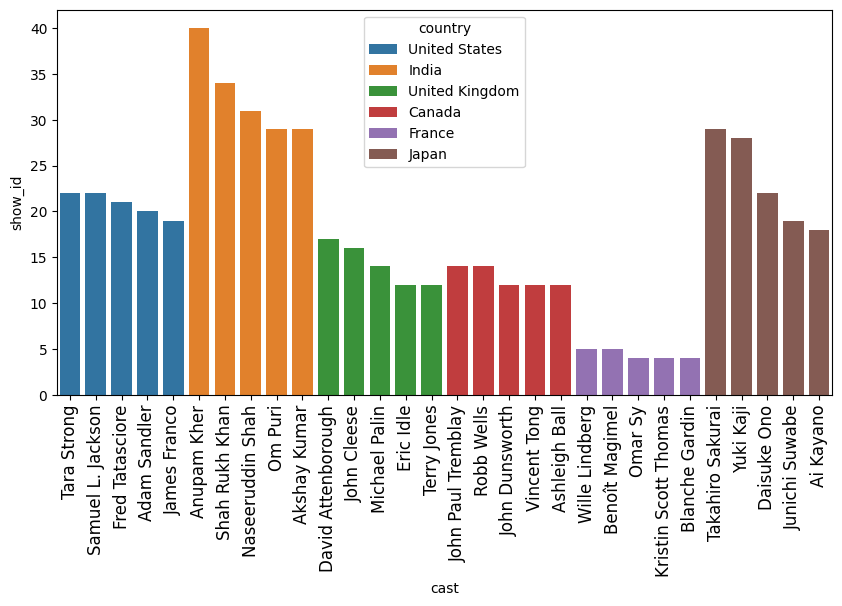

In [ ]:
plt.figure(figsize = (10, 5))
sns.barplot(data = top_5_actors , x = 'cast' , y = 'show_id' , hue = 'country')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

4. Who are the top actors by country?

In [ ]:
a = dir.merge(df_country, on = 'show_id').drop_duplicates()
a = a.groupby(['country', 'director'])['show_id'].count().reset_index()

In [ ]:
a.loc[a['country'].isin(['United States'])].sort_values('show_id', ascending = False).head()

,country,director,show_id
5704,United States,Marcus Raboy,15
5238,United States,Jay Karas,15
5237,United States,Jay Chapman,12
5750,United States,Martin Scorsese,12
6391,United States,Steven Spielberg,11


In [ ]:
a.loc[a['country'].isin(['India'])].sort_values('show_id', ascending = False).head()

,country,director,show_id
1774,India,David Dhawan,9
1703,India,Anurag Kashyap,9
2305,India,Umesh Mehra,8
1791,India,Dibakar Banerjee,7
2050,India,Priyadarshan,7


In [ ]:
top_5_dir = a.loc[a['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head()

In [ ]:
for i in country_list:
    b= a.loc[a['country'].isin([i])].sort_values('show_id', ascending = False).head()
    top_5_dir = pd.concat([top_5_dir, b], ignore_index= True)

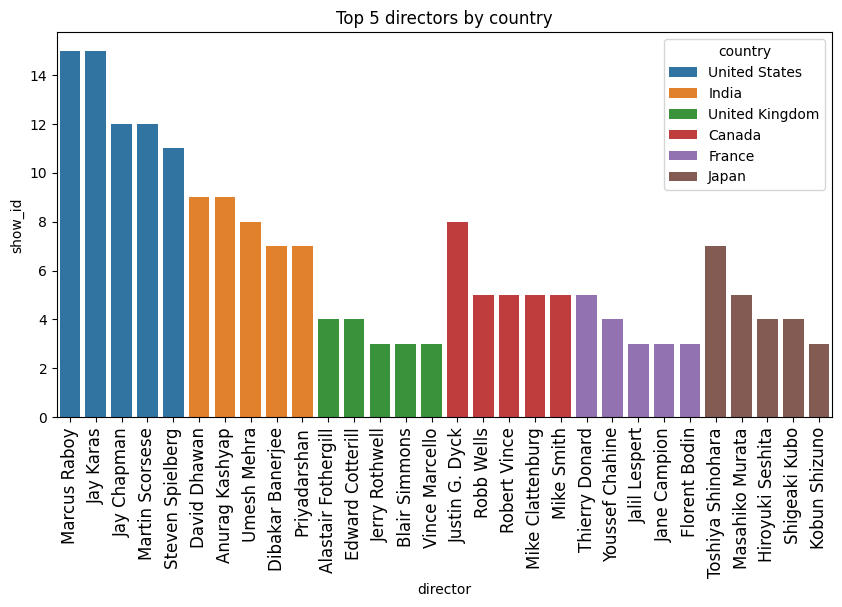

In [ ]:
plt.figure(figsize = (10, 5))
sns.barplot(data = top_5_dir , x = 'director' , y = 'show_id' , hue = 'country')
plt.xticks(rotation = 90 , fontsize = 12)
plt.title('Top 5 directors by country')
plt.show()

5. Who are top directors in each genre?

In [ ]:
genre_list = ['Action and adventure', 'Dramas', 'Comedies', 'Horror Movies', 'Thrillers', 'Documentaries', 'Sci-Fi & Fantasy', 'Korean TV Shows', 'Romantic Movies']
x = dir.merge(genre, on = 'show_id').drop_duplicates()
x = x.groupby(['listed_in', 'director'])['show_id'].count().reset_index()
top_5_dir = x.loc[x['listed_in'].isin(['International Movies & TV Shows'])].sort_values('show_id', ascending = False).head()
for i in genre_list:
    b = x.loc[x['listed_in'].isin([i])].sort_values('show_id', ascending = False).head()
    top_5_dir = pd.concat([top_5_dir, b], ignore_index= True)

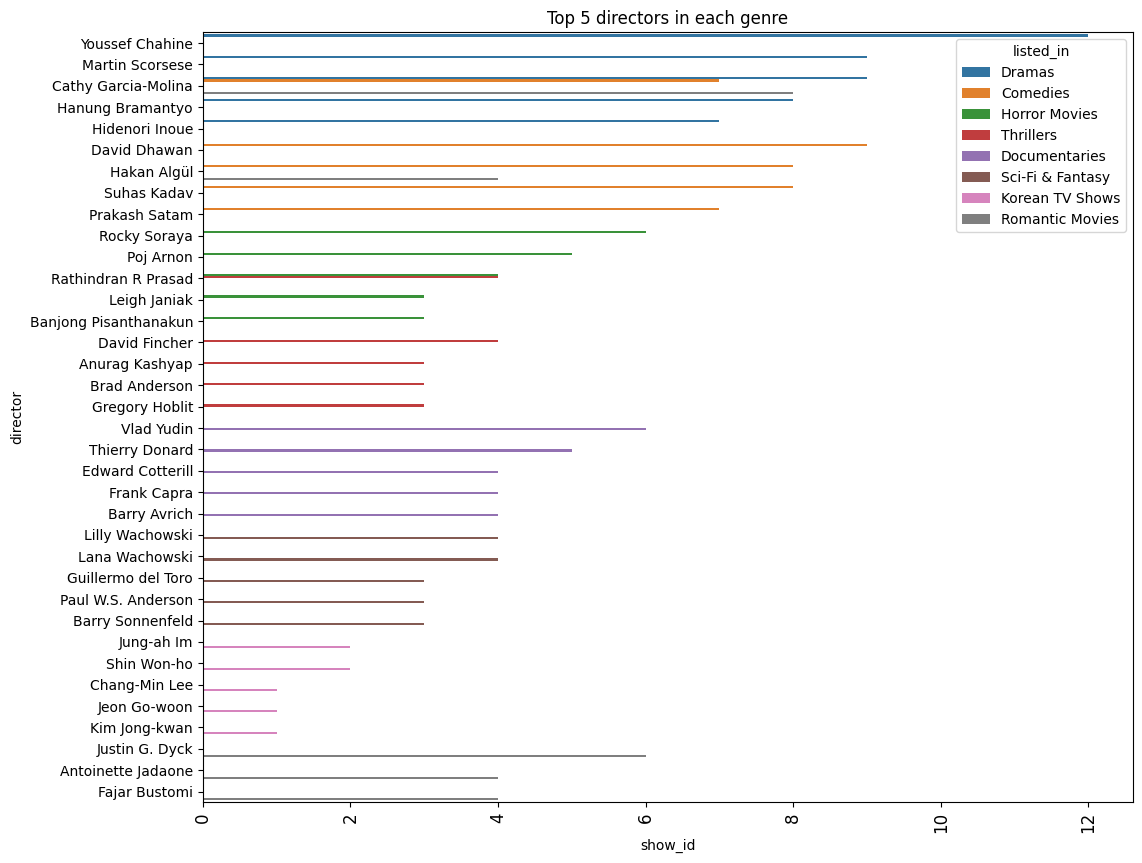

In [ ]:
plt.figure(figsize = (12, 10))
sns.barplot(data = top_5_dir , y = 'director' , x = 'show_id' , hue = 'listed_in')
plt.xticks(rotation = 90 , fontsize = 12)
plt.title('Top 5 directors in each genre')
plt.show()

6. When is maximum content added on Netflix during a year?

In [ ]:
# create a seperate table
month_year = df.groupby(['year_added', 'month_added'])['show_id'].count().reset_index()

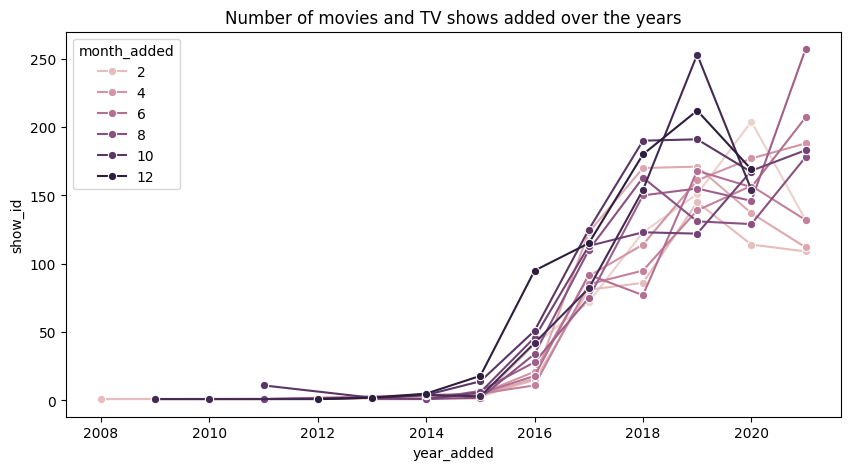

In [ ]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = month_year, x = 'year_added', y = 'show_id', hue = 'month_added', marker = 'o')
plt.title('Number of movies and TV shows added over the years')
plt.show()

7. Most contribution by countries to the content.

In [ ]:
country_list = df_country.country.value_counts().head(10).index
top10_country = df_country.loc[df_country['country'].isin(country_list)]
country_year = top10_country.merge(df, on = 'show_id')[['show_id','country_x','type_x','year_added']]
country_year.columns = ['show_id','country','type','year_added']

In [ ]:
country_year = country_year.groupby(['country','type','year_added'])['show_id'].count().reset_index()

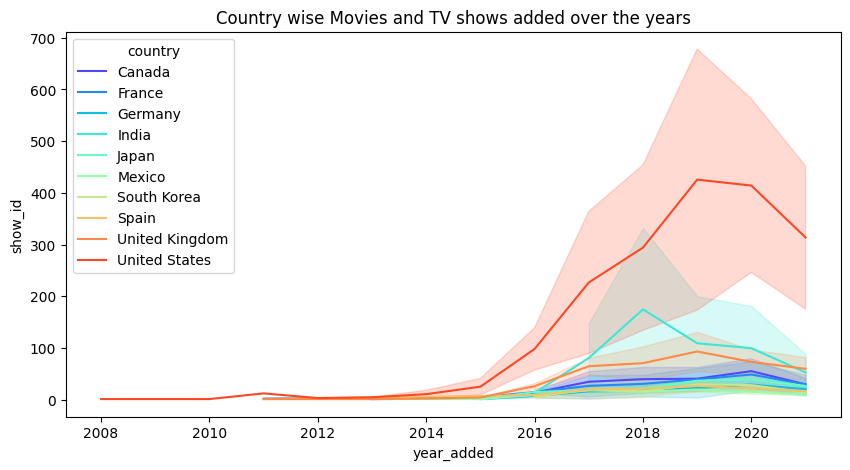

In [ ]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = country_year, x = 'year_added', y = 'show_id', hue = 'country', palette = 'rainbow')
plt.title('Country wise Movies and TV shows added over the years')
plt.show()

Observation:

US has always been biggest contributor to content followed by UK and Spain.

## Insights and Recommendations

1.	Of all the content, 70% content on Netflix is Movies and around 30% content is TV shows.
2.	In the year 2015, drastic increase in the content getting uploaded can be seen on Netflix. It continues to increase since then and 2019 is the year when  highest number of movies and TV shows added on the Netflix. Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not decreased as drastic as movies.
3.	Since 2018, A decrease in the movies is seen , but rise in TV shows is observed clearly.  Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of tv shows in recent years.
4.	Around 4993 directors have their movies or tv shows on Netflix.
5.	Netflix has movies from total 126 countries, United States contributes to around 37% of total content.
6.	The release year for movies fall between 1942 and 2021
7.	content with various ratings is available on Netflix, for the various viewers categories like kids, adults , families. Highest number of movies and TV shows are rated TV-MA (for mature audiences).
8.	Ratings like TV-Y7 , TV-Y7 FV , PG ,TV-G , G , TV-Y , TV-PG are very less available in all countries except US.
9.	There are total 42 genres in which the content is divided. International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.
10.	Some country specific popular genres are observed in each country except for United States which have a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.
11.	Indian Actors have been acted in maximum movies on netflix. Top 5 actors are in India based on quantity of movies:
i.	Anupam Kher (42)
ii.	Shah Rukh Khan (34)
iii.	Naseeruddin Shah(31)
iv.	Om Puri(29)
v.	Akshay Kumar(29)

* Netflix have majority of content which is released after the year 2000. It is observed that the content older than year 2000 is very scarce on Netflix. Senior Citizen could be the target audience for such content, which is almost missing currently.
* Maximum content (more than 80%) is
    * TV-MA - Content intended for mature audiences aged 17 and above.
    * TV-14 - Content suitable for viewers aged 14 and above.
    * TV-PG - Parental guidance suggested (similar ratings - PG-13 , PG)
    * R - Restricted Content, that may not be suitable for viewers under age 17.

These ratings' movies target Matured and Adult audience. Rest 20 % of the content is for kids aged below 13.
It shows that Netflix is currently serving mostly Mature audiences or Children with parental guidance.
* Most popular genres on Netflix are International Movies and TV Shows , Dramas , Comedies, Action & Adventure, Children & Family Movies, Thrillers.
* Maximum content of Netflix which is around 75% , is coming from the top 10 countries. Rest of the world only contributes 25% of the content. More countries can be focussed in future to grow the business.
* Liking towards the shorter duration content is on the rise. (duration 75 to 150 minutes and seasons 1 to 3)
This can be considered while production of new content on Netflix.
* drop in content is seen across all the countries and type of content in year 2020 and 2021, possibly because of Pandemic.

